# Logistic regression

<!---
AO: This is a very nice example. I would describe it as an application of logistic regression more so than an explanation of logistic regression.
I would suggest adding additional introductory content or make this the open problem-solving task for that day
I'm going to proceed as though will will add some additional introductory content
-->

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

### Dataset
 
 The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

### Source

 The original dataset is available at UCI Machine Learning Repository and can be downloaded from [this address](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).
 
 The link seems to not be active anymore.
 As of May 2020, this source worked: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f

### The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

<!---
AO: In the code below, I removed the np and os imports; they did not seem strictly necessary for this problem
-->

## Get the data

- First import `pandas` as `pd` so we can read the data file

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="importAs" id="^+Nghe{{_uq{G7tc)sr/" x="130" y="233"><field name="libraryName">pandas</field><field name="libraryAlias" id="lfN=$uzFcxs-6^)2j+oc">pd</field></block></xml>

<!---
AO: Since this is just openning a file, several options:

- Use full path for file in read command (Current choice)
- Assemble path from separate strings
- Store part of path in variable, then assemble

I also added an explanation for why we are defining the col names

Had to switch kernel to xpython here b/c Python 3 was not giving intellisense for pd
-->
Because our data file doesn't have column names, we need to define these:

- Create `col_names` and set to `"pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"`
- `with pd do read_csv` using a list containing
    - `"datasets/pima-indians-diabetes.csv"`
    - Freestyle `header=None`
    - Freestyle `names=col_names`

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv('datasets/pima-indians-diabetes.csv', header=None, names=col_names)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="IQf*;xg6v_OomTf~f[GH">col_names</variable><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="RrD9p9hIEM(11b:BnCS}" x="80" y="164"><field name="VAR" id="IQf*;xg6v_OomTf~f[GH">col_names</field><value name="VALUE"><block type="lists_create_with" id="K!#:=gJD5G-b!2(:s(R?"><mutation items="9"></mutation><value name="ADD0"><block type="text" id="SD:F|Ay]9B$V`Ob{aLl}"><field name="TEXT">pregnant</field></block></value><value name="ADD1"><block type="text" id="t6Q8pMqbU,gvZl+K_=X2"><field name="TEXT">glucose</field></block></value><value name="ADD2"><block type="text" id="%J/am1CT_SZ821l|+J~v"><field name="TEXT">bp</field></block></value><value name="ADD3"><block type="text" id="u#^A2*YRlM_72170I~wR"><field name="TEXT">skin</field></block></value><value name="ADD4"><block type="text" id="641,cjI}f[B_L7S89Mym"><field name="TEXT">insulin</field></block></value><value name="ADD5"><block type="text" id="r|DiG^kCA0lDpiqpmb#m"><field name="TEXT">bmi</field></block></value><value name="ADD6"><block type="text" id="hbpl;l?Yg/q|c2u-,Q6n"><field name="TEXT">pedigree</field></block></value><value name="ADD7"><block type="text" id="Cennj+K]HJHG6J7P=?Ck"><field name="TEXT">age</field></block></value><value name="ADD8"><block type="text" id="}pMtBJ*MQi0,O-)Bc/3("><field name="TEXT">label</field></block></value></block></value><next><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="TrI}GSSE8V$xub^riM5u"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/pima-indians-diabetes.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="}~=Vqwx)3tio0c_WdUsJ"><field name="CODE">header=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="ElN?aKCkXn9FY;aZrOj1"><field name="CODE">names=col_names</field></block></value></block></value></block></value></block></next></block></xml>

## Clean the data

Let's take a closer look at this dataset.
The dataset is in comma separated value (csv) format, which means each row of data is divided into columns using commas.
Often the first row of data like this will be a **header** row that gives the names of the columns.
However, in this case, something different is going on.
Let's take a look at the first 20 rows of the file:

- `with dataset do head` using `20`

<!---
AO: suggest breaking this up a bit and pacing in later cells
# Check the dataset: 777 lines of which 9 are a header/comments followed by 768 instances and of 9 values each.
# The dataset can be thought as a table with 768 rows and 9 columns.
# You can also think of the dataset as consisting of 768 instances of 9 values each.
# the first 8 values/columns are features/predictors
# the lat value is the class label (1 = has diabetes, 0 = no diabetes)
dataset.shape
-->

<!---
AO: Intelliblock error here: cannot find any methods of dataset? Tab completion works - strange
-->


In [3]:
dataset.head(20)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="varDoMethod" id="$Iz%Vwcs^X.{,Nj4(=N`" x="96" y="284"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><data>corr:</data></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,# 1. Number of times pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# 2. Plasma glucose concentration a 2 hours in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 3. Diastolic blood pressure (mm Hg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# 4. Triceps skin fold thickness (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# 5. 2-Hour serum insulin (mu U/ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,# 6. Body mass index (weight in kg/(height in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,# 7. Diabetes pedigree function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,# 8. Age (years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,# 9. Class variable (0 or 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0


As you can see, the first 9 rows (rows 0 to 8) are what we might expect in column headers. 
Since these rows are "junk" at this point, we should get rid of them.
One way to do that is to get a sublist of rows from dataset that excludes them:

- Set `dataset` to `in list dataset get sublist from #10 to last`

In [5]:
dataset = dataset[9 : ]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="variables_set" id=")4Jb3_GEY2c*yL;?So5u" x="-42" y="90"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><value name="VALUE"><block type="lists_getSublist" id="rl-]_~MS;z2V={kYSNp,"><mutation at1="true" at2="false"></mutation><field name="WHERE1">FROM_START</field><field name="WHERE2">LAST</field><value name="LIST"><block type="variables_get" id="eMp)r@@eR94XqVcF!$jM"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field></block></value><value name="AT1"><block type="math_number" id="0b(`0_!2QrO[)xe)3$2C"><field name="NUM">10</field></block></value></block></value></block></xml>

Now if we check the head again, we can see that the data looks OK:

- `with dataset do head` using `20`

In [6]:
dataset.head(20)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="varDoMethod" id="]AQwfxe7?D@@9!Ld]flb" x="121" y="213"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><data>dataset:</data><value name="INPUT"><block type="math_number" id="l}9B5ljDq1B)VgBA6BS5"><field name="NUM">20</field></block></value></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
14,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
15,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
16,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
17,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
18,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0


We should also check that we have as many rows as we think we're supposed to have.
In this case, we should have 768 rows and 9 columns.
You can also think of the dataset as consisting of 768 instances of 9 values each.
The last value is the class label (1 = has diabetes, 0 = no diabetes).
To get the #rows and columns:

- `from dataset get shape`

In [8]:
dataset.shape

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="varDoMethod" id="*.?cbal8ZgUS7{P:dO8N" x="8" y="188"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><field name="MEMBER">!Waiting for kernel to respond with options.</field><data>dataset:</data></block></xml>

(768, 9)

These are the results we expect.
There are other kinds of data checks we could do, e.g. look for extreme or impossible values, but we won't do that now.

## Explore the data

One of the most basic ways of exploring the data is to look at correlations.
Correlations show you how a variable is related to another variable.
When the correlation is further away from zero, the variables are more strongly related:

- Create `corr` and set to `with dataset do corr` using nothing
- Output `corr`

In [9]:
corr = dataset.corr()

corr

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="variables_set" id="KhhK42MjtJx4;6+jZhID" x="-33" y="130"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><value name="VALUE"><block type="varDoMethod" id=")@pt@`v52VowO=q3vMew"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><data>corr:</data></block></value></block><block type="variables_get" id="4(P[r{;~m!FcLB/$J@oH" x="-33" y="184"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></xml>

,glucose,bp,skin,insulin,bmi,pedigree,age,label
glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


This is a correlation matrix.
The diagonal is 1.0 because each variable is perfectly correlated with itself.
You might also notice that the upper and lower triangular matrices (above/below the diagonal) are mirror images of each other.

Sometimes its easier to interpret a correlation matrix if we plot it in color.
First we need to import a plotting library:

- Freestyle `%matplotlib inline`
- import `seaborn` as `sns`

<!-- 
AO: This fails with xpython. We seem to have a problem where Python is failing on some intellisense, and xpython is failing on inline plots 
-->

In [12]:
%matplotlib inline
import seaborn as sns

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="D(VMIP:3Y4l!SV:h@5h]">sns</variable></variables><block type="dummyNoOutputCodeBlock" id="cc2.F$[68kE?5m=uiR|+" x="-134" y="71"><field name="CODE">%matplotlib inline</field><next><block type="importAs" id="KF/b{}~aLfre9o2SwyKZ"><field name="libraryName">seaborn</field><field name="libraryAlias" id="D(VMIP:3Y4l!SV:h@5h]">sns</field></block></next></block></xml>

In [11]:
Now we can plot the correlation matrix using a heatmap.
In a heatmap, "hotter" colors (more red) indicate stronger correlations.

SyntaxError: invalid syntax (<string>, line 1)

In [13]:
sns.heatmap(corr, annot=True)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="D(VMIP:3Y4l!SV:h@5h]">sns</variable><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable></variables><block type="varDoMethod" id="CGUGQ=:J|)$Hsn^awX}|" x="-94" y="212"><field name="VAR" id="D(VMIP:3Y4l!SV:h@5h]">sns</field><field name="MEMBER">heatmap</field><data>sns:heatmap</data><value name="INPUT"><block type="lists_create_with" id="1gO@*3q]KBigbAsE#6Te"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="SwJIEYrRq}}0%?x)V*mq"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="sd6X5%R:oPEP2y|eU#0m"><field name="CODE">annot=True</field></block></value></block></value></block></xml>

**AO stopped here**

```python
# inspect the data to understand it better: the distribution of values, any outliers, any missing values, etc.
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()
```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb563528320>,
      dtype=object)

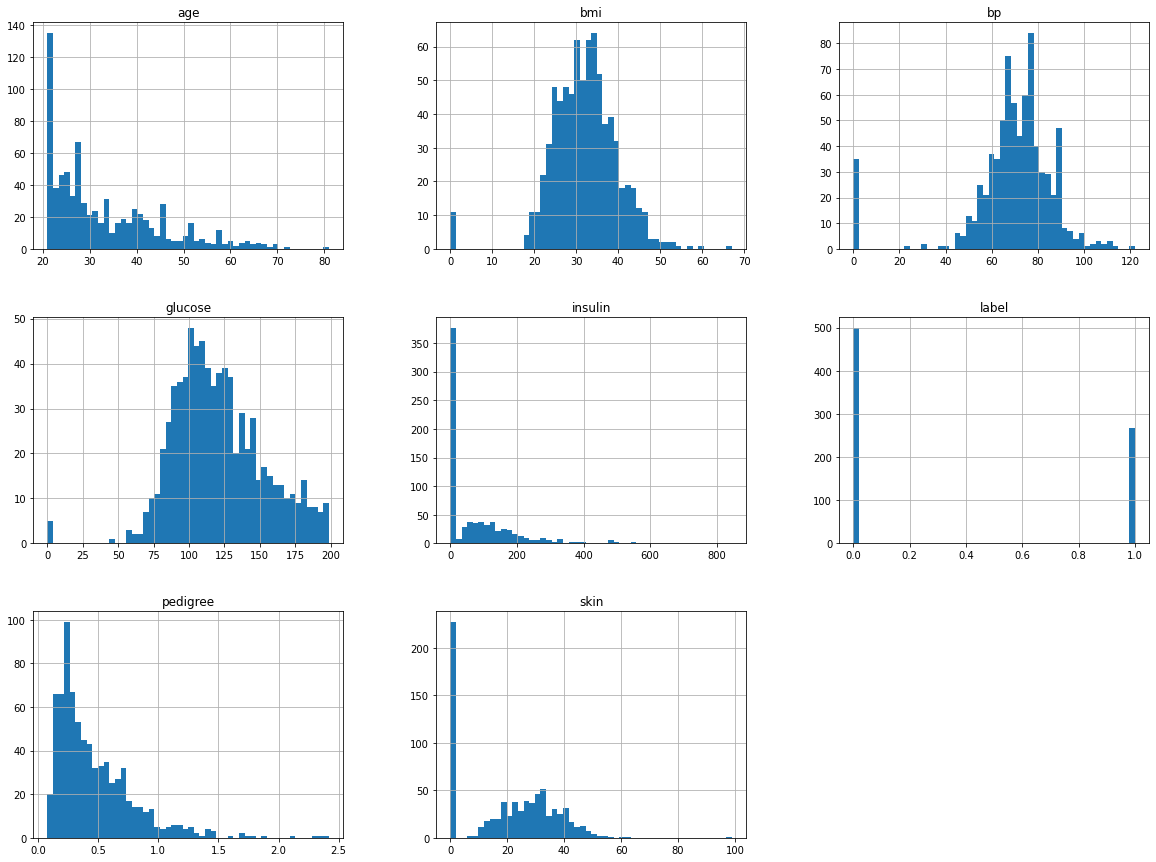

In [18]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(20,15))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="qN3n|Zw74$XMmPiY(`c-">plt</variable><variable id="swlLC~#1lKg9NwN1wW6m">dataset</variable></variables><block type="importAs" id="%*{7_*B?JhFx4mNxLRg3" x="-162" y="10"><field name="libraryName">matplotlib.pyplot</field><field name="libraryAlias" id="qN3n|Zw74$XMmPiY(`c-">plt</field></block><block type="varDoMethod" id="3!{UXLD^NBBfw+B@#0P/" x="-170" y="192"><field name="VAR" id="swlLC~#1lKg9NwN1wW6m">dataset</field><data>plt:</data><value name="INPUT"><block type="lists_create_with" id="pPepMm/$W~KP[YgG,1oG"><mutation items="2"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="Q%7/9DAMqtP[a(D/whN4"><field name="CODE">bins=50</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Hhtc3%/|5inWw#ltLz8X"><field name="CODE">figsize=(20,15)</field></block></value></block></value></block></xml>

```python
# sanitize the data

# Calculate the median value for bmi
median_bmi = dataset['bmi'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['bmi'] = dataset['bmi'].replace(
    to_replace=0, value=median_bmi)

# Calculate the median value for bp
median_bp = dataset['bp'].median()
# Substitute it in the bp column of the
# dataset where values are 0
dataset['bp'] = dataset['bp'].replace(
    to_replace=0, value=median_bp)

# Calculate the median value for glucose
median_glucose = dataset['glucose'].median()
# Substitute it in the glucose column of the
# dataset where values are 0
dataset['glucose'] = dataset['glucose'].replace(
    to_replace=0, value=median_glucose)

# Calculate the median value for skin
median_skin = dataset['skin'].median()
# Substitute it in the skin column of the
# dataset where values are 0
dataset['skin'] = dataset['skin'].replace(
    to_replace=0, value=median_skin)

# Calculate the median value for insulin
median_insulin = dataset['insulin'].median()
# Substitute it in the insulin column of the
# dataset where values are 0
dataset['insulin'] = dataset['insulin'].replace(
    to_replace=0, value=median_insulin)
```

In [128]:
# Split the dataset into train/test subsests following a 80% - 20% split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

In [129]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["label"].copy()
train_set = train_set.drop("label", axis=1)

test_set_labels = test_set["label"].copy()
test_set = test_set.drop("label", axis=1)

In [130]:
# feature scaling is needed to bring all predictors into comparable value scales
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

# inspect scaled values
scaledTrainingDataset = pd.DataFrame(data=train_set_scaled)
scaledTrainingDataset.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


In [131]:
# Training a Logistic Regression model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_set_scaled,train_set_labels)

#
test_set_predictedLabels = logreg.predict(test_set_scaled)

In [132]:
# inspect performance
# Performance can be assessed using the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_set_predictedLabels, test_set_labels)
cnf_matrix

array([[85, 22],
       [14, 33]])

In [133]:
# Print accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(test_set_labels, test_set_predictedLabels))
print("Precision:",metrics.precision_score(test_set_labels, test_set_predictedLabels))
print("Recall:",metrics.recall_score(test_set_labels, test_set_predictedLabels))

Accuracy: 0.7662337662337663
Precision: 0.7021276595744681
Recall: 0.6


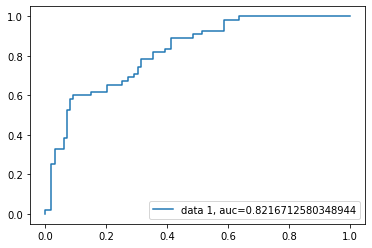

In [134]:
# generate the ROC curve
test_predicted_proba = logreg.predict_proba(test_set_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_set_labels,  test_predicted_proba)
auc = metrics.roc_auc_score(test_set_labels, test_predicted_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [135]:
# make a prediction oa new instance

# We create a new instance for, say, a particular new patient
new_instance = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_instance_scaled = scaler.transform(new_instance)
# We predict the outcome
prediction = logreg.predict(new_instance_scaled)
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1.])